# Create Datasets

We have written several pre-made datasets based on [PyG's dataset specifications](https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_dataset.html) and provide easy ways to help you build the subsets of data you need!

In [1]:
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from rdkit import Chem
from torch_geometric.data import Data

from qm9star_query.dataset.base_dataset import BaseQM9starDataset
from qm9star_query.dataset.sub_datasets import (
    AnionQM9starDataset,
    CationQM9starDataset,
    NeutralQM9starDataset,
    RadicalQM9starDataset,
)
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400, 400


def draw_mol_with_prop(dataset, index, prop_name):
    mol = dataset.get_rdmol(index)
    for at, prop in zip(mol.GetAtoms(), getattr(dataset[index], prop_name)):
        lbl = "{:.2f}".format(prop)
        at.SetProp("atomNote", lbl)
    # mol.RemoveAllConformers()
    return mol


pt = Chem.GetPeriodicTable()

# energy from /tutorial/atom_ref
atom_enthalpy = {
    "H": -0.4997955,
    "C": -37.7895481,
    "N": -54.4969004,
    "O": -74.9865458,
    "F": -99.7582197,
}


def get_total_atom_enthalpy(atom_list: list[int]):
    return sum(atom_enthalpy[Chem.Atom(atom).GetSymbol()] for atom in atom_list)


def transform_data(raw_data):
    return Data(
        pos=torch.tensor(raw_data["coords"], dtype=torch.float32),
        z=torch.tensor(raw_data["atoms"], dtype=torch.int64),
        energy=torch.tensor(raw_data["single_point_energy"], dtype=torch.float32),
        formation_enthalpy=torch.tensor(
            raw_data["H_T"] - get_total_atom_enthalpy(raw_data["atoms"]),
            dtype=torch.float32,
        ),
        y=torch.tensor(raw_data["single_point_energy"], dtype=torch.float32),
        energy_grad=-torch.tensor(raw_data["forces"], dtype=torch.float32),
        formal_charges=torch.tensor(raw_data["formal_charges"], dtype=torch.int64),
        formal_num_radicals=torch.tensor(
            raw_data["formal_num_radicals"], dtype=torch.int64
        ),
        bonds=torch.tensor(raw_data["bonds"], dtype=torch.int64),
        mulliken_charge=torch.tensor(raw_data["mulliken_charge"], dtype=torch.float32),
        spin_densities=torch.tensor(raw_data["spin_densities"], dtype=torch.float32),
        zpve=torch.tensor(raw_data["zpve"], dtype=torch.float32),
        energy_correction=torch.tensor(
            raw_data["energy_correction"], dtype=torch.float32
        ),
        enthalpy_correction=torch.tensor(
            raw_data["enthalpy_correction"], dtype=torch.float32
        ),
        gibbs_free_energy_correction=torch.tensor(
            raw_data["gibbs_free_energy_correction"], dtype=torch.float32
        ),
        U_0=torch.tensor(raw_data["U_0"], dtype=torch.float32),
        U_T=torch.tensor(raw_data["U_T"], dtype=torch.float32),
        H_T=torch.tensor(raw_data["H_T"], dtype=torch.float32),
        G_T=torch.tensor(raw_data["G_T"], dtype=torch.float32),
        S=torch.tensor(raw_data["S"], dtype=torch.float32),
        Cv=torch.tensor(raw_data["Cv"], dtype=torch.float32),
        rotation_consts=torch.tensor(raw_data["rotation_consts"], dtype=torch.float32),
        isotropic_polarizability=torch.tensor(
            raw_data["isotropic_polarizability"], dtype=torch.float32
        ),
        electronic_spatial_extent=torch.tensor(
            raw_data["electronic_spatial_extent"], dtype=torch.float32
        ),
        alpha_homo=torch.tensor(raw_data["alpha_homo"], dtype=torch.float32),
        alpha_lumo=torch.tensor(raw_data["alpha_lumo"], dtype=torch.float32),
        alpha_gap=torch.tensor(raw_data["alpha_gap"], dtype=torch.float32),
        dipole=torch.tensor(raw_data["dipole"], dtype=torch.float32),
        quadrupole=torch.tensor(raw_data["quadrupole"], dtype=torch.float32),
        octapole=torch.tensor(raw_data["octapole"], dtype=torch.float32),
        hexadecapole=torch.tensor(raw_data["hexadecapole"], dtype=torch.float32),
        npa_charges=torch.tensor(raw_data["npa_charges"], dtype=torch.float32),
        id=torch.tensor(raw_data["id"], dtype=torch.int64),
    )


def transform_data_radical(raw_data):
    return Data(
        pos=torch.tensor(raw_data["coords"], dtype=torch.float32),
        z=torch.tensor(raw_data["atoms"], dtype=torch.int64),
        energy=torch.tensor(raw_data["single_point_energy"], dtype=torch.float32),
        formation_enthalpy=torch.tensor(
            raw_data["H_T"] - get_total_atom_enthalpy(raw_data["atoms"]),
            dtype=torch.float32,
        ),
        y=torch.tensor(raw_data["single_point_energy"], dtype=torch.float32),
        energy_grad=-torch.tensor(raw_data["forces"], dtype=torch.float32),
        formal_charges=torch.tensor(raw_data["formal_charges"], dtype=torch.int64),
        formal_num_radicals=torch.tensor(
            raw_data["formal_num_radicals"], dtype=torch.int64
        ),
        bonds=torch.tensor(raw_data["bonds"], dtype=torch.int64),
        mulliken_charge=torch.tensor(raw_data["mulliken_charge"], dtype=torch.float32),
        spin_densities=torch.tensor(raw_data["spin_densities"], dtype=torch.float32),
        zpve=torch.tensor(raw_data["zpve"], dtype=torch.float32),
        energy_correction=torch.tensor(
            raw_data["energy_correction"], dtype=torch.float32
        ),
        enthalpy_correction=torch.tensor(
            raw_data["enthalpy_correction"], dtype=torch.float32
        ),
        gibbs_free_energy_correction=torch.tensor(
            raw_data["gibbs_free_energy_correction"], dtype=torch.float32
        ),
        U_0=torch.tensor(raw_data["U_0"], dtype=torch.float32),
        U_T=torch.tensor(raw_data["U_T"], dtype=torch.float32),
        H_T=torch.tensor(raw_data["H_T"], dtype=torch.float32),
        G_T=torch.tensor(raw_data["G_T"], dtype=torch.float32),
        S=torch.tensor(raw_data["S"], dtype=torch.float32),
        Cv=torch.tensor(raw_data["Cv"], dtype=torch.float32),
        rotation_consts=torch.tensor(raw_data["rotation_consts"], dtype=torch.float32),
        isotropic_polarizability=torch.tensor(
            raw_data["isotropic_polarizability"], dtype=torch.float32
        ),
        electronic_spatial_extent=torch.tensor(
            raw_data["electronic_spatial_extent"], dtype=torch.float32
        ),
        alpha_homo=torch.tensor(raw_data["alpha_homo"], dtype=torch.float32),
        alpha_lumo=torch.tensor(raw_data["alpha_lumo"], dtype=torch.float32),
        alpha_gap=torch.tensor(raw_data["alpha_gap"], dtype=torch.float32),
        dipole=torch.tensor(raw_data["dipole"], dtype=torch.float32),
        quadrupole=torch.tensor(raw_data["quadrupole"], dtype=torch.float32),
        octapole=torch.tensor(raw_data["octapole"], dtype=torch.float32),
        hexadecapole=torch.tensor(raw_data["hexadecapole"], dtype=torch.float32),
        npa_charges=torch.tensor(raw_data["npa_charges"], dtype=torch.float32),
        spin_quantum_number=torch.tensor(
            raw_data["spin_quantum_number"], dtype=torch.float32
        ),
        spin_square=torch.tensor(raw_data["spin_square"], dtype=torch.float32),
        id=torch.tensor(raw_data["id"], dtype=torch.int64),
    )

As with several of the dataset classes imported above, the `BaseQM9starDataset` class is a base class that is not recommended to be used directly. Instead, you should use one of the subclasses that are defined in the `qm9star_query.dataset.sub_datasets` module, or create your own subclass of `BaseQM9starDataset`.

If you are using these dataset classes for the first time, you must specify the PostgreSQL database instance to which you need to connect in the initialisation. How to deploy it is described in the [download_and_deploy_qm9star](1-download_and_deploy_qm9star.md).

After executing the following code, a subset of the specified range will be downloaded from the QM9star database and cached in npz format. The dataset will then execute the `process` method to transform each piece of data into a tensor based on the `transform` function passed in.You can replace the `transform` function as per your requirement.

In order to extract a customised subset, you need to inherit the `BaseQM9starDataset` class and override the `db_select` method, which allows you to define a database query, and then only the data that satisfies the query will be downloaded. We use SQLModel as our database engine. For more information on how to customise the meticulous query statements, you can visit [SQLModel's documentation](https://sqlmodel.tiangolo.com/) ( owesome tutorial on getting started with databases), or refer to our implementation from this project.

We also provide another way to customise datasets without inheritance. Simply use the `BaseQM9starDataset` class and pass in a `selector_func` function with the same specification as the previous method. In [4-train_a_NN_potential_model.ipynb](4-train_a_NN_potential_model.ipynb) we demonstrate the method.

In [2]:
scheme = "postgresql+psycopg2"
POSTGRES_USER = "hxchem"
POSTGRES_PASSWD = "hxchem"
POSTGRES_SERVER = "127.0.0.1"  # actual server address
POSTGRES_PORT = 35432  # actual port
POSTGRES_DB = "qm9star"

In [3]:
neutral_dataset = NeutralQM9starDataset(
    user=POSTGRES_USER,
    password=POSTGRES_PASSWD,
    server=POSTGRES_SERVER,
    port=POSTGRES_PORT,
    db=POSTGRES_DB,
    dataset_name="qm9star_neutral",
    block_num=5,
    log=True,
    transform=transform_data,
)

In [4]:
cation_dataset = CationQM9starDataset(
    user=POSTGRES_USER,
    password=POSTGRES_PASSWD,
    server=POSTGRES_SERVER,
    port=POSTGRES_PORT,
    db=POSTGRES_DB,
    dataset_name="qm9star_cation",
    block_num=5,
    log=True,
    transform=transform_data,
)

In [5]:
anion_dataset = AnionQM9starDataset(
    user=POSTGRES_USER,
    password=POSTGRES_PASSWD,
    server=POSTGRES_SERVER,
    port=POSTGRES_PORT,
    db=POSTGRES_DB,
    dataset_name="qm9star_anion",
    block_num=5,
    log=True,
    transform=transform_data,
)

In [6]:
radical_dataset = RadicalQM9starDataset(
    user=POSTGRES_USER,
    password=POSTGRES_PASSWD,
    server=POSTGRES_SERVER,
    port=POSTGRES_PORT,
    db=POSTGRES_DB,
    dataset_name="qm9star_radical",
    block_num=5,
    log=True,
    transform=transform_data_radical,
)

If your transform function defines `pos`, `z`, `bonds`, `formal_charges` and `formal_num_radicals` as our implementation, you can use the `get_rdmol` method to get the RDKit molecule. Here is an example:

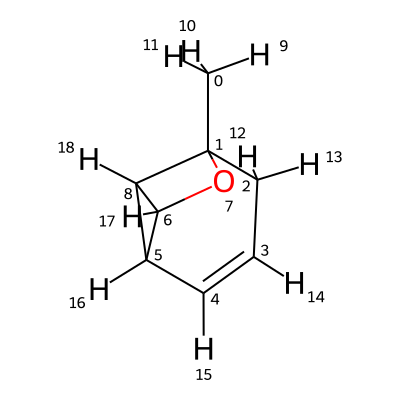

In [7]:
neutral_dataset.get_rdmol(100000)

## Dataset Distribution

###  Distribution of global features

**Global features** are the features of a molecule as a whole.

In [37]:
global_features_neutral_df = pd.DataFrame(
    {
        "Energy($\\times10^2$ Hartree)": neutral_dataset.energy / 1e2,
        "Formation Enthalpy(Hartree)": neutral_dataset.formation_enthalpy,
        "HOMO-LUMO Gap(Hartree)": neutral_dataset.alpha_gap,
        "zpve(Hartree)": neutral_dataset.zpve,
        "Enthalpy($\\times10^2$ Hartree)": neutral_dataset.H_T / 1e2,
        "Entropy(cal/mol/K)": neutral_dataset.S,
        "Free Energy($\\times10^2$ Hartree)": neutral_dataset.G_T / 1e2,
        "$\\alpha$($\\times10^2$ $bohr^3$)": neutral_dataset.isotropic_polarizability
        / 1e2,
        "$<R^2>$($bohr^2$)": neutral_dataset.electronic_spatial_extent,
    }
)
global_features_neutral_df["class"] = "neutral"
global_features_cation_df = pd.DataFrame(
    {
        "Energy($\\times10^2$ Hartree)": cation_dataset.energy / 1e2,
        "Formation Enthalpy(Hartree)": cation_dataset.formation_enthalpy,
        "HOMO-LUMO Gap(Hartree)": cation_dataset.alpha_gap,
        "zpve(Hartree)": cation_dataset.zpve,
        "Enthalpy($\\times10^2$ Hartree)": cation_dataset.H_T / 1e2,
        "Entropy(cal/mol/K)": cation_dataset.S,
        "Free Energy($\\times10^2$ Hartree)": cation_dataset.G_T / 1e2,
        "$\\alpha$($\\times10^2$ $bohr^3$)": cation_dataset.isotropic_polarizability
        / 1e2,
        "$<R^2>$($bohr^2$)": cation_dataset.electronic_spatial_extent,
    }
)
global_features_cation_df["class"] = "cation"
global_features_anion_df = pd.DataFrame(
    {
        "Energy($\\times10^2$ Hartree)": anion_dataset.energy / 1e2,
        "Formation Enthalpy(Hartree)": anion_dataset.formation_enthalpy,
        "HOMO-LUMO Gap(Hartree)": anion_dataset.alpha_gap,
        "zpve(Hartree)": anion_dataset.zpve,
        "Enthalpy($\\times10^2$ Hartree)": anion_dataset.H_T / 1e2,
        "Entropy(cal/mol/K)": anion_dataset.S,
        "Free Energy($\\times10^2$ Hartree)": anion_dataset.G_T / 1e2,
        "$\\alpha$($\\times10^2$ $bohr^3$)": anion_dataset.isotropic_polarizability
        / 1e2,
        "$<R^2>$($bohr^2$)": anion_dataset.electronic_spatial_extent,
    }
)
global_features_anion_df["class"] = "anion"
global_features_radical_df = pd.DataFrame(
    {
        "Energy($\\times10^2$ Hartree)": radical_dataset.energy / 1e2,
        "Formation Enthalpy(Hartree)": radical_dataset.formation_enthalpy,
        # Actually SOMO, just trick for plotting
        "HOMO-LUMO Gap(Hartree)": radical_dataset.alpha_homo,
        "zpve(Hartree)": radical_dataset.zpve,
        "Enthalpy($\\times10^2$ Hartree)": radical_dataset.H_T / 1e2,
        "Entropy(cal/mol/K)": radical_dataset.S,
        "Free Energy($\\times10^2$ Hartree)": radical_dataset.G_T / 1e2,
        "$\\alpha$($\\times10^2$ $bohr^3$)": radical_dataset.isotropic_polarizability
        / 1e2,
        "$<R^2>$($bohr^2$)": radical_dataset.electronic_spatial_extent,
        "Spin Quantum Number": radical_dataset.spin_quantum_number,
        "Spin Square": radical_dataset.spin_square,
    }
)
global_features_radical_df["class"] = "radical"

In [38]:
global_features_total_df = pd.concat(
    [
        global_features_neutral_df,
        global_features_cation_df,
        global_features_anion_df,
        global_features_radical_df,
    ]
).reset_index(drop=True)


def draw_global_feature_distribution(df: pd.DataFrame, feature_name: str, index=0):
    def annotate(data, **kws):
        ax = plt.gca()
        ax.text(
            0.5,
            0.9,
            f"$\mu$ ={data[feature_name].mean():>7.3f}",
            transform=ax.transAxes,
        )
        ax.text(
            0.5,
            0.8,
            f"$\sigma$ ={data[feature_name].std():>7.3f}",
            transform=ax.transAxes,
        )

    with sns.axes_style("ticks"):
        g = sns.displot(
            data=df,
            x=feature_name,
            col="class",
            kind="hist",
            height=2,
            aspect=1.5,
            color=sns.color_palette("tab10")[index],
            facet_kws={"despine": False},
        )
        g = g.map_dataframe(annotate)
        g.figure.subplots_adjust(wspace=0, hspace=0)
    plt.ticklabel_format(style="sci", axis="y",
                         scilimits=(0, 0), useMathText=True)
    return g

### The total Enthalpy

The Enthalpy is strongly correlated with the number of atoms in the molecule, and there are many molecules with different atomic compositions in the dataset, and the distribution of energies of the isomers approximates a normal distribution. The distribution is therefore shown as a superposition of several small normal distributions.

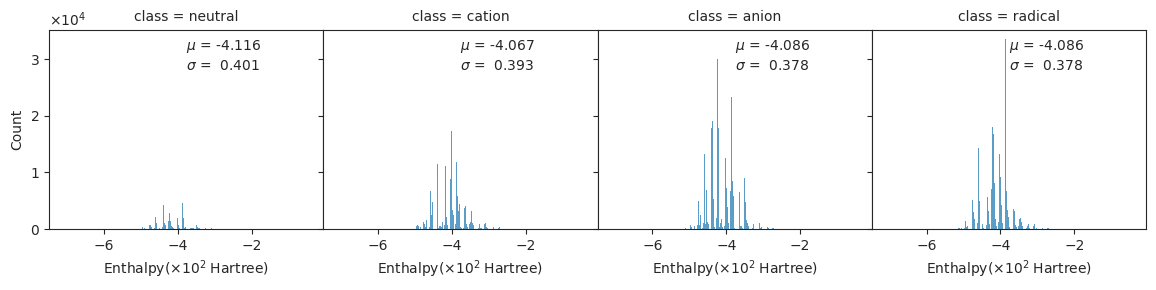

In [12]:
g = draw_global_feature_distribution(
    global_features_total_df, "Enthalpy($\\times10^2$ Hartree)", 0
)
g.figure.set_size_inches(12, 4)
g.figure.savefig("img/global_g1.svg", bbox_inches="tight")

We define `Formation Enthalpy` as the Enthalpy of a molecule minus the sum of the Enthalpies of all its atoms. This energy distribution can be found to be very close to a normal distribution.

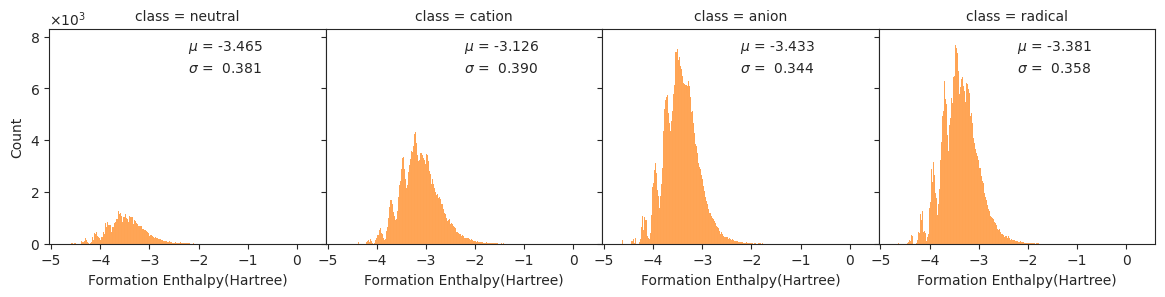

In [180]:
g = draw_global_feature_distribution(
    global_features_total_df, "Formation Enthalpy(Hartree)", 1
)
g.figure.set_size_inches(12, 4)
g.figure.savefig("img/global_g2.svg", bbox_inches="tight")

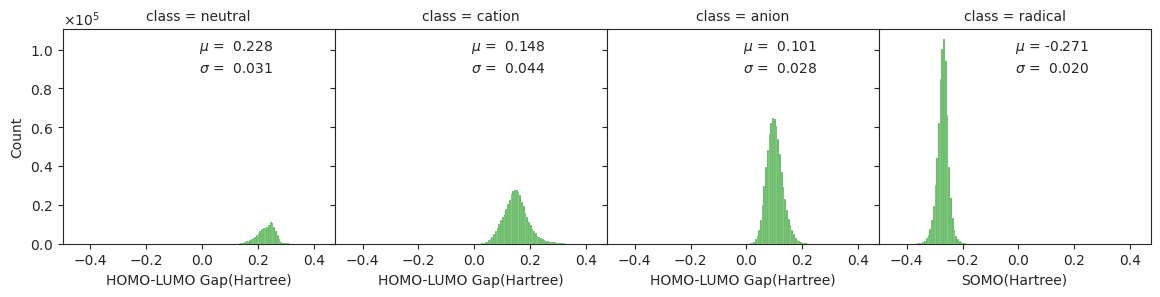

In [40]:
g = draw_global_feature_distribution(
    global_features_total_df, "HOMO-LUMO Gap(Hartree)", 2
)
g.figure.axes[3].set_xlabel("SOMO(Hartree)")
g.figure.set_size_inches(12, 4)
g.figure.savefig("img/global_g3.svg", bbox_inches="tight")

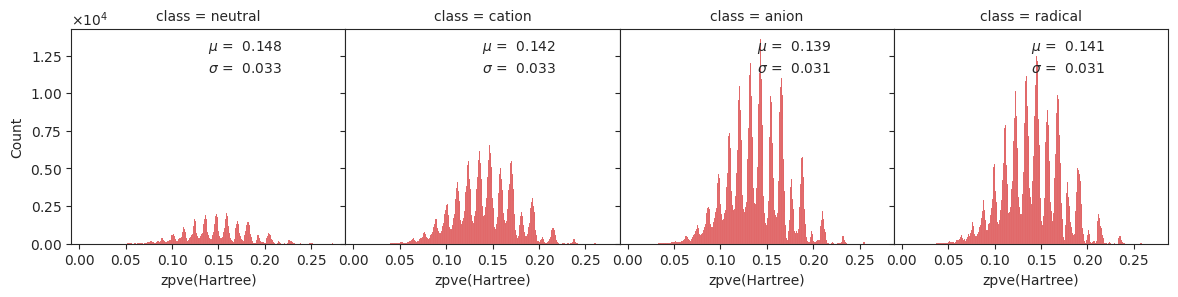

In [182]:
g = draw_global_feature_distribution(global_features_total_df, "zpve(Hartree)", 3)
g.figure.set_size_inches(12, 4)
g.figure.savefig("img/global_g4.svg", bbox_inches="tight")

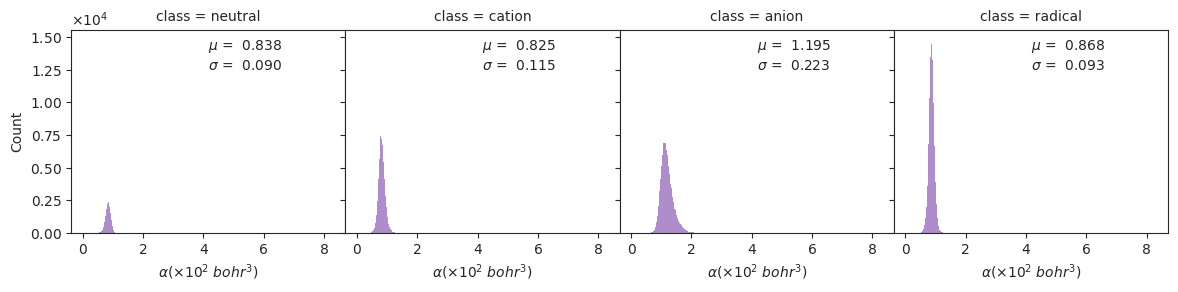

In [183]:
g = draw_global_feature_distribution(
    global_features_total_df, "$\\alpha$($\\times10^2$ $bohr^3$)", 4
)
g.figure.set_size_inches(12, 4)
g.figure.savefig("img/global_g5.svg", bbox_inches="tight")

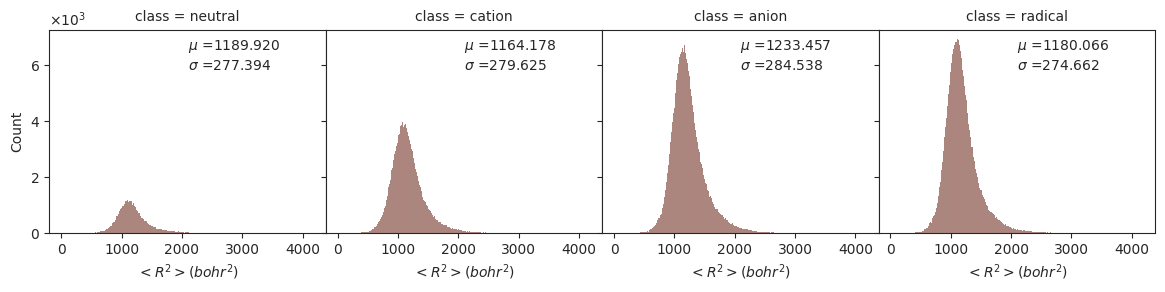

In [184]:
g = draw_global_feature_distribution(
    global_features_total_df, "$<R^2>$($bohr^2$)", 5)
g.figure.set_size_inches(12, 4)
g.figure.savefig("img/global_g6.svg", bbox_inches="tight")

### Distribution of local features

**Local features** are the features that can be assigned locally to a molecule. In the QM9star dataset, are atomic level features.

In [104]:
local_features_neutral_df = pd.DataFrame(
    {
        "Element": map(lambda x: pt.GetElementSymbol(int(x)), neutral_dataset.z),
        "|Force|($\\times10^{-3}$ hartree/bohr)": neutral_dataset.energy_grad.norm(
            dim=-1
        )
        * 1e3,
        "Mulliken Charge": neutral_dataset.mulliken_charge,
        "NPA Charge": neutral_dataset.npa_charges,
    }
)
local_features_neutral_df["class"] = "neutral"
local_features_cation_df = pd.DataFrame(
    {
        "Element": map(lambda x: pt.GetElementSymbol(int(x)), cation_dataset.z),
        "|Force|($\\times10^{-3}$ hartree/bohr)": cation_dataset.energy_grad.norm(
            dim=-1
        )
        * 1e3,
        "Mulliken Charge": cation_dataset.mulliken_charge,
        "NPA Charge": cation_dataset.npa_charges,
    }
)
local_features_cation_df["class"] = "cation"
local_features_anion_df = pd.DataFrame(
    {
        "Element": map(lambda x: pt.GetElementSymbol(int(x)), anion_dataset.z),
        "|Force|($\\times10^{-3}$ hartree/bohr)": anion_dataset.energy_grad.norm(dim=-1)
        * 1e3,
        "Mulliken Charge": anion_dataset.mulliken_charge,
        "NPA Charge": anion_dataset.npa_charges,
    }
)
local_features_anion_df["class"] = "anion"
local_features_radical_df = pd.DataFrame(
    {
        "Element": map(lambda x: pt.GetElementSymbol(int(x)), radical_dataset.z),
        "|Force|($\\times10^{-3}$ hartree/bohr)": radical_dataset.energy_grad.norm(
            dim=-1
        )
        * 1e3,
        "Mulliken Charge": radical_dataset.mulliken_charge,
        "Mulliken Spin Density": radical_dataset.spin_densities,
        "NPA Charge": radical_dataset.npa_charges,
    }
)
local_features_radical_df["class"] = "radical"

In [105]:
local_features_total_df = (
    pd.concat(
        [
            local_features_neutral_df,
            local_features_cation_df,
            local_features_anion_df,
            local_features_radical_df,
        ]
    )
    .reset_index(drop=True)
    .fillna(0)
)

We provide atomic forces for all molecules in the Cartesian coordinate system. 

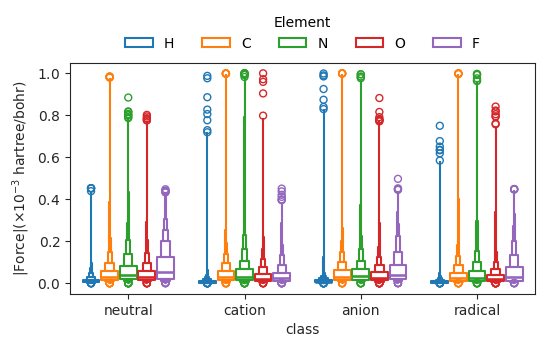

In [168]:
with sns.axes_style("ticks"):
    g1 = sns.boxenplot(
        data=local_features_total_df,
        x="class",
        y="|Force|($\\times10^{-3}$ hartree/bohr)",
        hue="Element",
        hue_order=["H", "C", "N", "O", "F"],
        fill=False,
        native_scale=True,
        gap=0.1,
    )
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0), useMathText=True)
sns.move_legend(g1, "lower center", bbox_to_anchor=(
    0.5, 1), ncol=5, frameon=False)
g1.figure.set_size_inches(6, 3)
g1.figure.savefig("img/g1.svg", bbox_inches="tight")

Distribution of Mulliken spin density

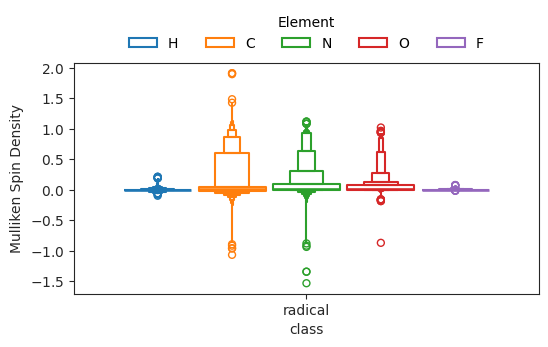

In [172]:
with sns.axes_style("ticks"):
    g2 = sns.boxenplot(
        data=local_features_radical_df,
        x="class",
        y="Mulliken Spin Density",
        hue="Element",
        hue_order=["H", "C", "N", "O", "F"],
        fill=False,
        native_scale=True,
        gap=0.1,
    )
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0), useMathText=True)
sns.move_legend(g2, "lower center", bbox_to_anchor=(0.5, 1), ncol=5, frameon=False)
g2.figure.set_size_inches(6, 3)
g2.figure.savefig("img/g2.svg", bbox_inches="tight")

Distribution of Mullieken charge

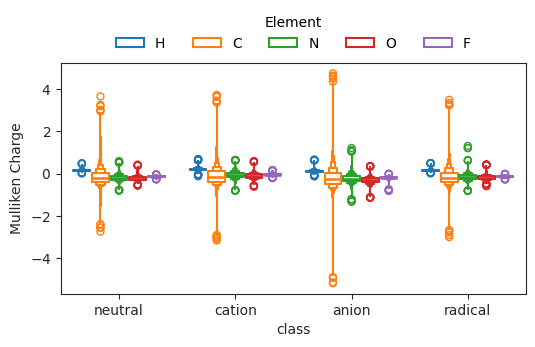

In [173]:
with sns.axes_style("ticks"):
    g3 = sns.boxenplot(
        data=local_features_total_df,
        x="class",
        y="Mulliken Charge",
        hue="Element",
        hue_order=["H", "C", "N", "O", "F"],
        fill=False,
        native_scale=True,
        gap=0.1,
    )
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0), useMathText=True)
sns.move_legend(g3, "lower center", bbox_to_anchor=(0.5, 1), ncol=5, frameon=False)
g3.figure.set_size_inches(6, 3)
g3.figure.savefig("img/g3.svg", bbox_inches="tight")

Find out the outliers of Mulliken charge

In [107]:
neutral_outliers = [
    (idx, int(mol.id))
    for idx, mol in enumerate(neutral_dataset)
    if mol.mulliken_charge.abs().max() > 3
]

In [114]:
neutral_outliers = sorted(
    neutral_outliers,
    key=lambda x: neutral_dataset[x[0]].mulliken_charge.abs().max(),
    reverse=True,
)

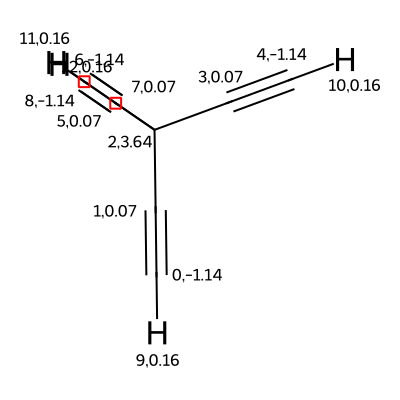

In [117]:
neutral_outlier = neutral_outliers[0]
mol = draw_mol_with_prop(neutral_dataset, neutral_outlier[0], "mulliken_charge")
Chem.MolToXYZFile(mol, f"{neutral_outlier[1]}.xyz")
mol

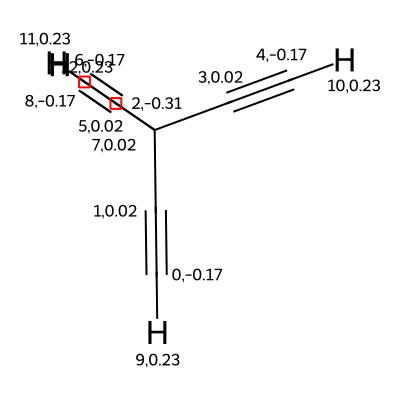

In [118]:
neutral_outlier = neutral_outliers[0]
mol = draw_mol_with_prop(neutral_dataset, neutral_outlier[0], "npa_charges")
mol

In [119]:
cation_outliers = [
    (idx, int(mol.id))
    for idx, mol in enumerate(cation_dataset)
    if mol.mulliken_charge.abs().max() > 3
]

In [120]:
cation_outliers = sorted(
    cation_outliers,
    key=lambda x: cation_dataset[x[0]].mulliken_charge.abs().max(),
    reverse=True,
)

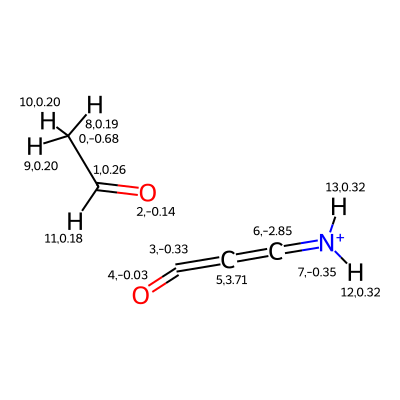

In [121]:
cation_outlier = cation_outliers[0]
mol = draw_mol_with_prop(cation_dataset, cation_outlier[0], "mulliken_charge")
Chem.MolToXYZFile(mol, f"{cation_outlier[1]}.xyz")
mol

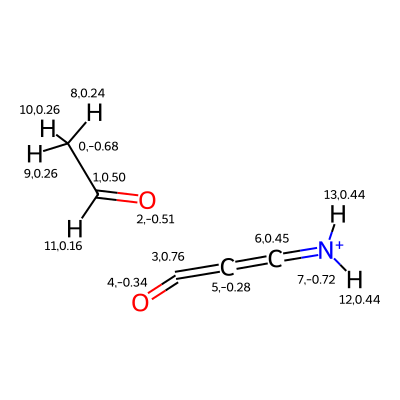

In [122]:
cation_outlier = cation_outliers[0]
mol = draw_mol_with_prop(cation_dataset, cation_outlier[0], "npa_charges")
mol

In [123]:
radical_outliers = [
    (idx, int(mol.id))
    for idx, mol in enumerate(radical_dataset)
    if mol.mulliken_charge.abs().max() > 3
]

In [124]:
radical_outliers = sorted(
    radical_outliers,
    key=lambda x: radical_dataset[x[0]].mulliken_charge.abs().max(),
    reverse=True,
)

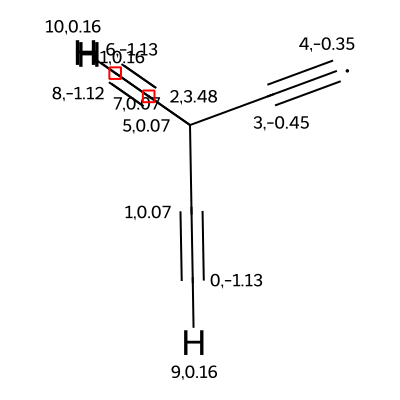

In [125]:
radical_outlier = radical_outliers[0]
mol = draw_mol_with_prop(
    radical_dataset, radical_outlier[0], "mulliken_charge")
Chem.MolToXYZFile(mol, f"{radical_outlier[1]}.xyz")
mol

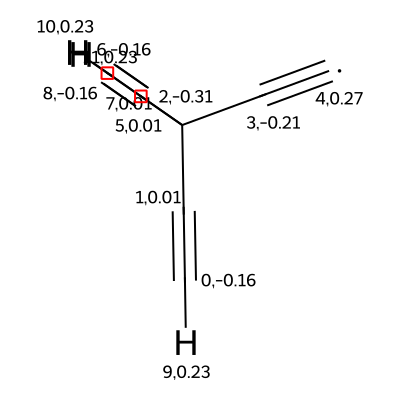

In [126]:
radical_outlier = radical_outliers[0]
mol = draw_mol_with_prop(radical_dataset, radical_outlier[0], "npa_charges")
mol

In [127]:
anion_outliers = [
    (idx, int(mol.id))
    for idx, mol in enumerate(anion_dataset)
    if mol.mulliken_charge.abs().max() > 3
]

In [128]:
anion_outliers = sorted(
    anion_outliers,
    key=lambda x: anion_dataset[x[0]].mulliken_charge.abs().max(),
    reverse=True,
)

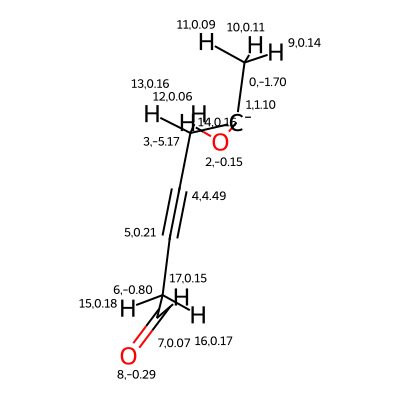

In [129]:
anion_outlier = anion_outliers[0]
mol = draw_mol_with_prop(anion_dataset, anion_outlier[0], "mulliken_charge")
Chem.MolToXYZFile(mol, f"{anion_outlier[1]}.xyz")
mol

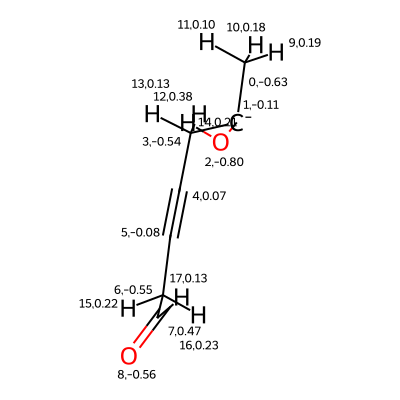

In [130]:
anion_outlier = anion_outliers[0]
mol = draw_mol_with_prop(anion_dataset, anion_outlier[0], "npa_charges")
mol

Distribution of NPA charge

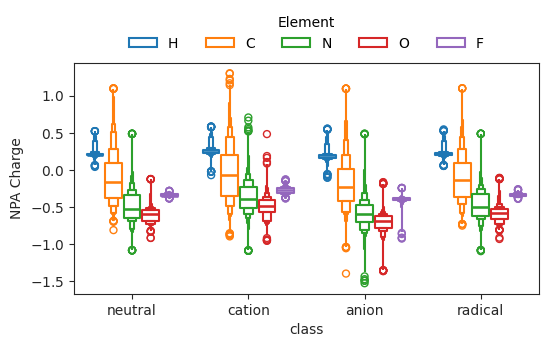

In [171]:
with sns.axes_style("ticks"):
    g4 = sns.boxenplot(
        data=local_features_total_df,
        x="class",
        y="NPA Charge",
        hue="Element",
        hue_order=["H", "C", "N", "O", "F"],
        fill=False,
        native_scale=True,
        gap=0.1,
    )
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0), useMathText=True)
sns.move_legend(g4, "lower center", bbox_to_anchor=(
    0.5, 1), ncol=5, frameon=False)
g4.figure.set_size_inches(6, 3)
g4.figure.savefig("img/g4.svg", bbox_inches="tight")

## Compare with QM9 dataset

In [46]:
qm9_ref = pd.read_csv("qm9_ref/qm9_global.csv")

In [47]:
def process_neutral(data: dict):
    return {
        "name": data["filename"].split(".")[0].split("-")[0],
        "U0_qm9star": data["U_0"],
        "U_qm9star": data["U_T"],
        "H_qm9star": data["H_T"],
        "G_qm9star": data["G_T"],
        "zpve_qm9star": data["zpve"],
        "homo_qm9star": data["alpha_homo"],
        "lumo_qm9star": data["alpha_lumo"],
        "gap_qm9star": data["alpha_gap"],
        "Cv_qm9star": data["Cv"],
        "alpha_qm9star": data["isotropic_polarizability"],
        "r2_qm9star": data["electronic_spatial_extent"],
    }


qm9star_dfs = []
for npz_file in glob("raw/qm9star_neutral_chunk*.npz"):
    qm9star_df = [
        pd.DataFrame([process_neutral(row)])
        for row in np.load(npz_file, allow_pickle=True)["data"]
    ]
    qm9star_df = pd.concat(qm9star_df)
    qm9star_dfs.append(qm9star_df)
qm9star_neutral_df = pd.concat(qm9star_dfs)
total_neutral_df = qm9star_neutral_df.merge(qm9_ref, on="name")

In [51]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error


def static_log(
    dataset: pd.DataFrame, col_name1: str, col_name2: str, feature_name: str
):
    print(
        "{:6s}: Mean of {:15s}={:10.5g} | STD of {:15s}={:10.5g} | Mean of {:15s}={:10.5g} | STD of {:15s}={:10.5g} | R2={:10.5g} | MAE={:10.5g} | RMSE={:10.5g}".format(
            feature_name,
            col_name1,
            dataset[col_name1].mean(),
            col_name1,
            dataset[col_name1].std(),
            col_name2,
            dataset[col_name2].mean(),
            col_name2,
            dataset[col_name2].std(),
            r2_score(dataset[col_name1], dataset[col_name2]),
            mean_absolute_error(dataset[col_name1], dataset[col_name2]),
            root_mean_squared_error(dataset[col_name1], dataset[col_name2]),
        )
    )


static_log(total_neutral_df, "U0", "U0_qm9star", "U_0")
static_log(total_neutral_df, "zpve", "zpve_qm9star", "zpve")
static_log(total_neutral_df, "U", "U_qm9star", "U")
static_log(total_neutral_df, "H", "H_qm9star", "H")
static_log(total_neutral_df, "G", "G_qm9star", "G")
static_log(total_neutral_df, "Cv", "Cv_qm9star", "Cv")
static_log(total_neutral_df, "homo", "homo_qm9star", "homo")
static_log(total_neutral_df, "lumo", "lumo_qm9star", "lumo")
static_log(total_neutral_df, "gap", "gap_qm9star", "gap")
static_log(total_neutral_df, "alpha", "alpha_qm9star", "alpha")
static_log(total_neutral_df, "r2", "r2_qm9star", "r2")

U_0   : Mean of U0             =   -411.49 | STD of U0             =    40.047 | Mean of U0_qm9star     =   -411.61 | STD of U0_qm9star     =    40.058 | R2=   0.99999 | MAE=   0.11778 | RMSE=   0.11841
zpve  : Mean of zpve           =   0.14862 | STD of zpve           =  0.033232 | Mean of zpve_qm9star   =   0.14842 | STD of zpve_qm9star   =  0.033275 | R2=   0.99994 | MAE= 0.0002176 | RMSE= 0.0002628
U     : Mean of U              =   -411.48 | STD of U              =    40.047 | Mean of U_qm9star      =    -411.6 | STD of U_qm9star      =    40.058 | R2=   0.99999 | MAE=   0.11777 | RMSE=    0.1184
H     : Mean of H              =   -411.48 | STD of H              =    40.047 | Mean of H_qm9star      =    -411.6 | STD of H_qm9star      =    40.058 | R2=   0.99999 | MAE=   0.11777 | RMSE=    0.1184
G     : Mean of G              =   -411.52 | STD of G              =    40.048 | Mean of G_qm9star      =   -411.64 | STD of G_qm9star      =    40.059 | R2=   0.99999 | MAE=    0.1178 | R

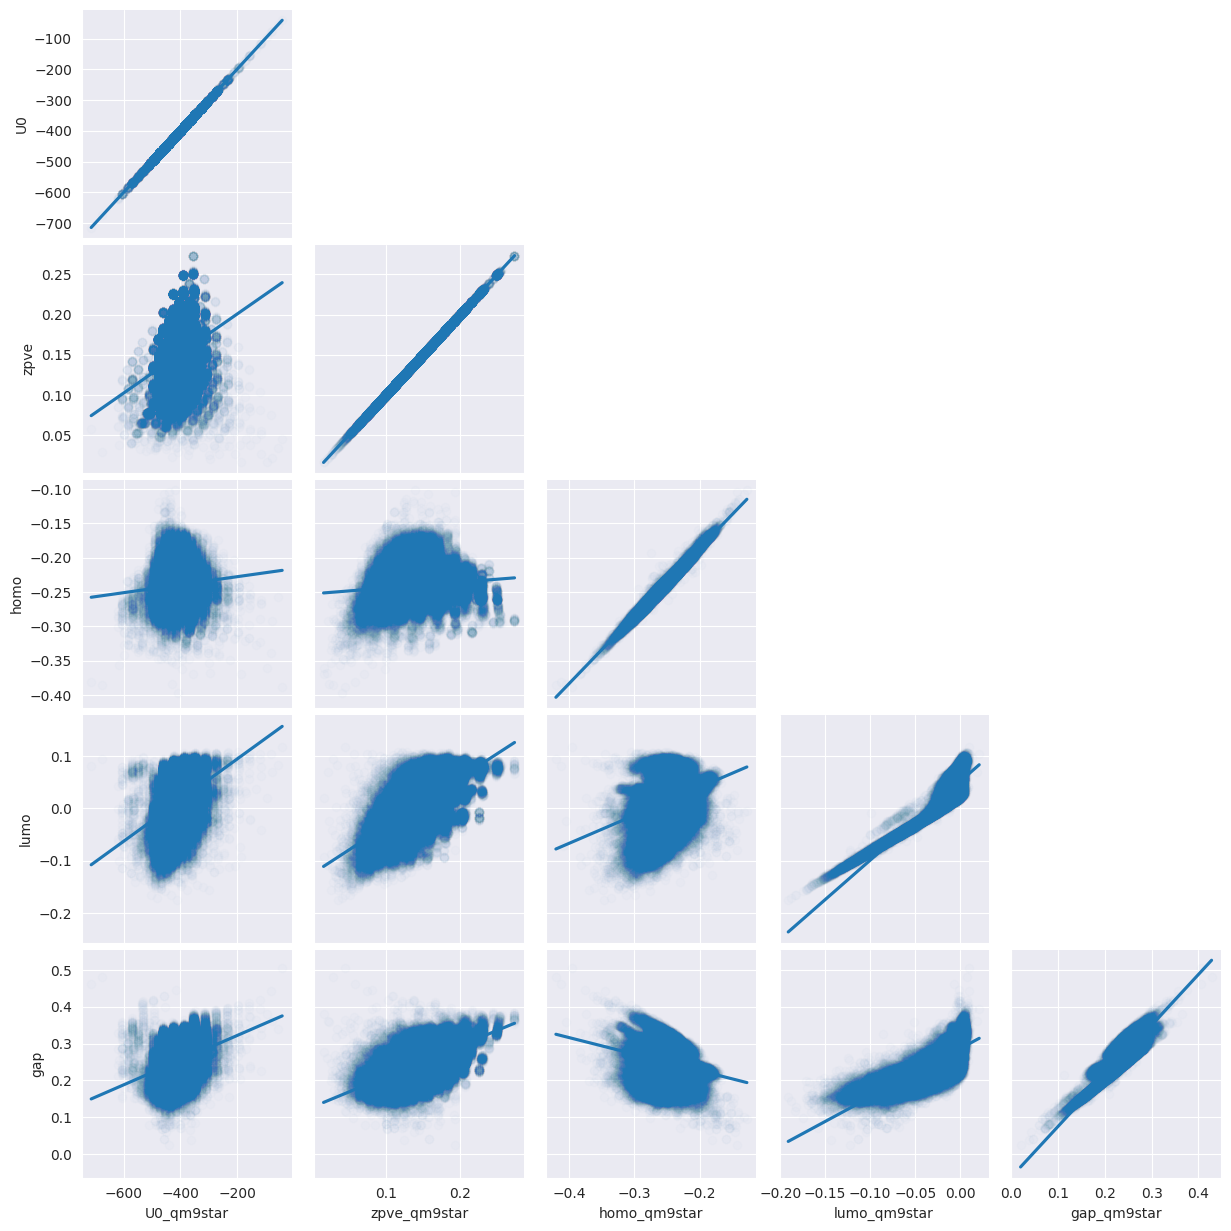

In [23]:
with sns.axes_style("darkgrid"):
    g = sns.pairplot(
        total_neutral_df,
        x_vars=[
            "U0_qm9star",
            "zpve_qm9star",
            "homo_qm9star",
            "lumo_qm9star",
            "gap_qm9star",
        ],
        y_vars=["U0", "zpve", "homo", "lumo", "gap"],
        kind="reg",
        markers="o",
        corner=True,
        plot_kws={
            "scatter_kws": {
                "alpha": 0.01,
            }
        },
    )

We can see that the molecular potentials calculated from the QM9 dataset under the new basis group correspond well to the corresponding molecular potentials in QM9. The orbital energies have a large change due to the difference in the basis sets.

In [24]:
def process_neutral(data: dict):
    return {
        "name": data["filename"].split(".")[0].split("-")[0],
        "U0_qm9star": data["U_0"],
        "U_qm9star": data["U_T"],
        "H_qm9star": data["H_T"],
        "G_qm9star": data["G_T"],
        "zpve_qm9star": data["zpve"],
        "homo_qm9star": data["alpha_homo"],
        "lumo_qm9star": data["alpha_lumo"],
        "gap_qm9star": data["alpha_gap"],
    }


qm9star_dfs = []
for npz_file in glob("raw/qm9star_[!n]*_chunk*.npz"):
    qm9star_df = [
        pd.DataFrame([process_neutral(row)])
        for row in np.load(npz_file, allow_pickle=True)["data"]
    ]
    qm9star_df = pd.concat(qm9star_df)
    qm9star_dfs.append(qm9star_df)
qm9star_no_neutral_df = pd.concat(qm9star_dfs)
total_no_neutral_df = qm9star_no_neutral_df.merge(qm9_ref, on="name")

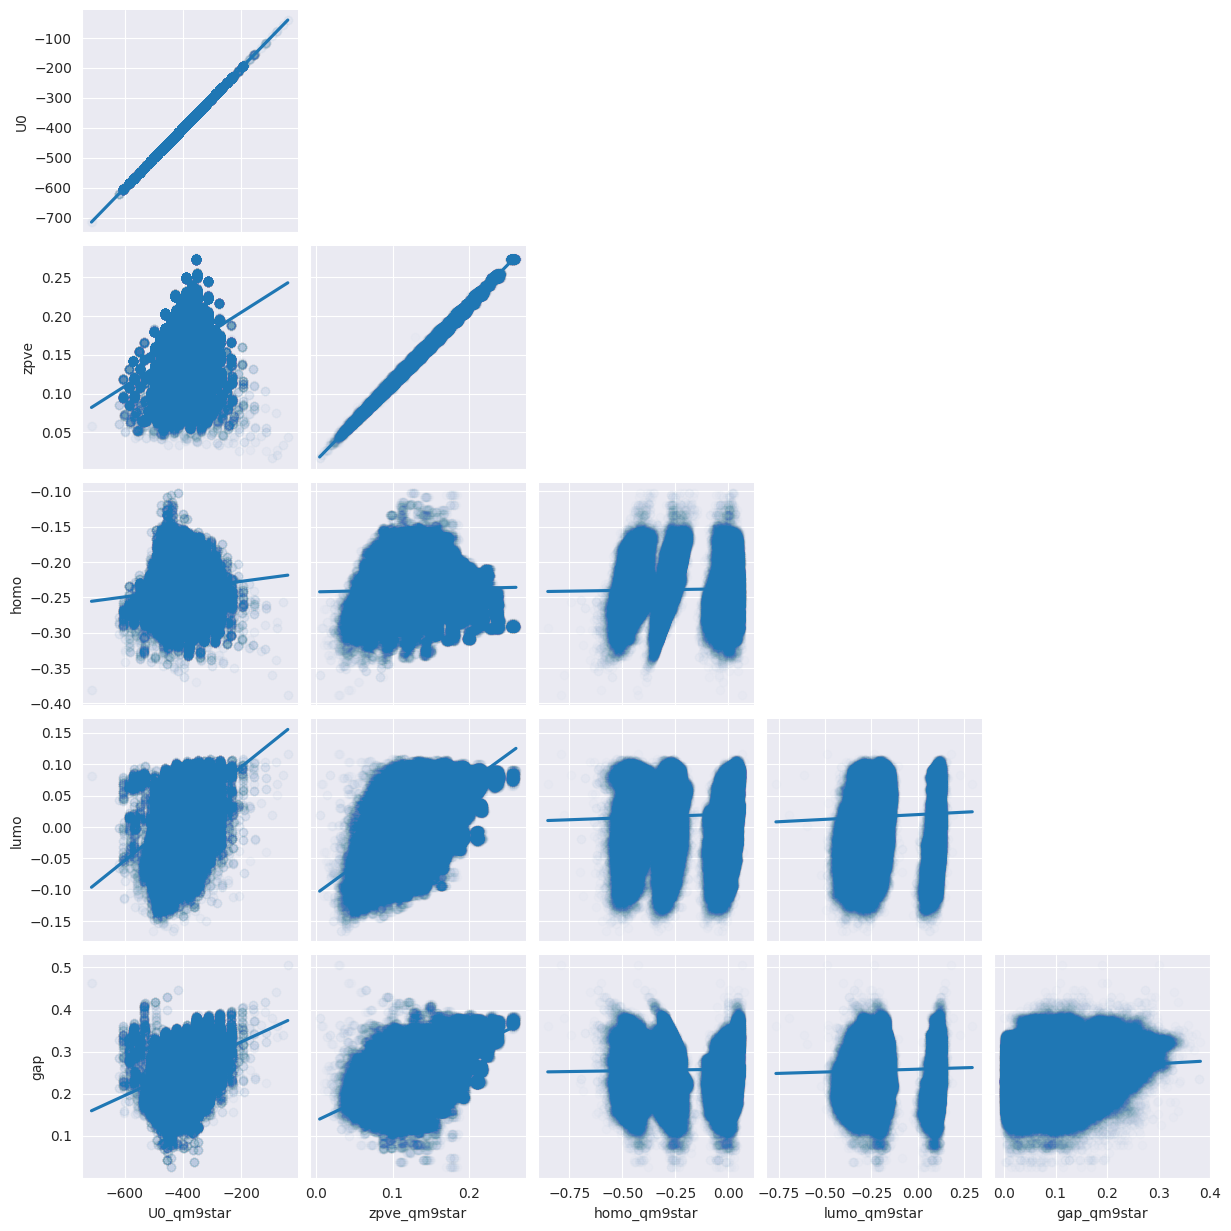

In [25]:
with sns.axes_style("darkgrid"):
    g = sns.pairplot(
        total_no_neutral_df,
        x_vars=[
            "U0_qm9star",
            "zpve_qm9star",
            "homo_qm9star",
            "lumo_qm9star",
            "gap_qm9star",
        ],
        y_vars=["U0", "zpve", "homo", "lumo", "gap"],
        kind="reg",
        markers="o",
        corner=True,
        plot_kws={
            "scatter_kws": {
                "alpha": 0.01,
            }
        },
    )

The QM9-derived molecule has just one less hydrogen atom compared to the original molecule, so the potential energy does not change much. The orbital energies, on the other hand, have a huge change in distribution due to the great influence of charges and radicals